![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [4]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [5]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

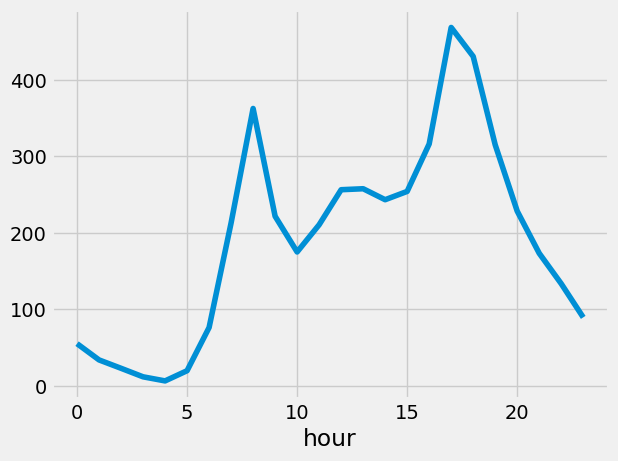

In [7]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot();

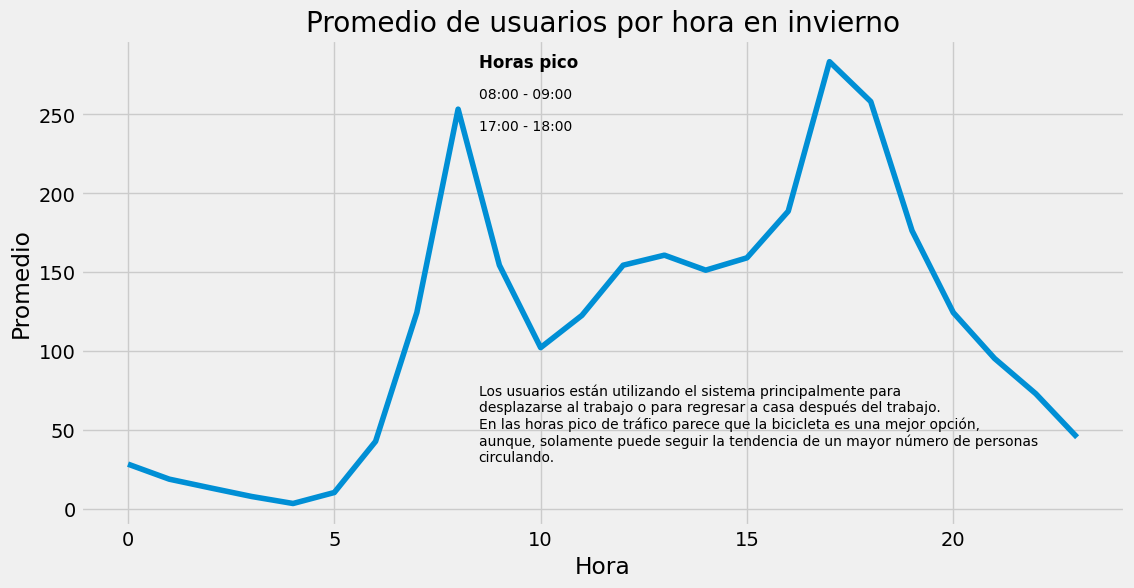

In [232]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos
plt.figure(figsize=(12,6))
bikes[bikes.season == 1].groupby('hour').total.mean().plot() # season (1:winter, 2:spring, 3:summer, 4:fall)
descripcion = """
Los usuarios están utilizando el sistema principalmente para 
desplazarse al trabajo o para regresar a casa después del trabajo.
En las horas pico de tráfico parece que la bicicleta es una mejor opción,
aunque, solamente puede seguir la tendencia de un mayor número de personas
circulando."""

plt.title('Promedio de usuarios por hora en invierno')
plt.xlabel("Hora")
plt.ylabel("Promedio")
plt.text(8.5, 280, 'Horas pico', fontsize=12, fontweight='bold')
plt.text(8.5, 260, '08:00 - 09:00 ', fontsize=10)
plt.text(8.5, 240, '17:00 - 18:00', fontsize=10)
plt.text(8.5, 30, descripcion, fontsize=10);

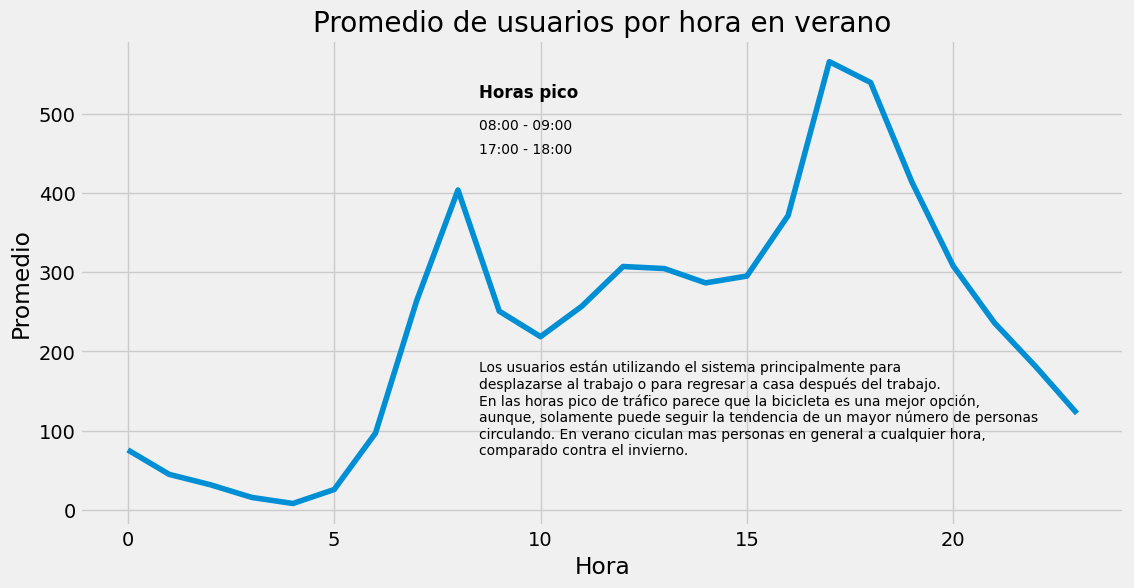

In [233]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos
plt.figure(figsize=(12,6))
bikes[bikes.season == 3].groupby('hour').total.mean().plot(); # season (1:winter, 2:spring, 3:summer, 4:fall)
descripcion = """
Los usuarios están utilizando el sistema principalmente para 
desplazarse al trabajo o para regresar a casa después del trabajo.
En las horas pico de tráfico parece que la bicicleta es una mejor opción,
aunque, solamente puede seguir la tendencia de un mayor número de personas
circulando. En verano ciculan mas personas en general a cualquier hora, 
comparado contra el invierno.
"""
plt.title('Promedio de usuarios por hora en verano')
plt.xlabel("Hora")
plt.ylabel("Promedio")
plt.text(8.5, 520, 'Horas pico', fontsize=12, fontweight='bold')
plt.text(8.5, 480, '08:00 - 09:00 ', fontsize=10)
plt.text(8.5, 450, '17:00 - 18:00', fontsize=10)
plt.text(8.5, 50, descripcion, fontsize=10);


### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

,Coeficientes,Interpretacion
hour,10.545206,Se espera un aumento promedio de 10 pasajeros por cada hora que avanza el día
season_spring,16.234114,"Se espera que en primavera, en promedio, haya un aumento de 16 personas con respecto al otoño"
season_summer,35.384432,"Se espera que en verano, en promedio, haya un aumento de 35 personas con respecto al otoño"
season_winter,-84.083118,"Se espera que en invierno, en promedio, haya una disminución de 84 personas con respecto al otoño"
Intercepto,77.652855,"Se espera, que en promedio, cuando las demas variables explicativas sean cero, hallan 77 personas"


La principal limitación de la regresión lineal es que asume un comportamiento lineal entre las variables, 
lo cual no siempre es cierto. En el caso de la predicción del número de usuarios, se observa en la gráfica que no hay un 
patrón estable a medida que avanzan las horas del día. Por lo tanto, el modelo puede fallar en ciertas horas, incluso si se
incluyen variables como las horas pico o valle. Para una predicción más precisa, se requerirían de más variables.



None

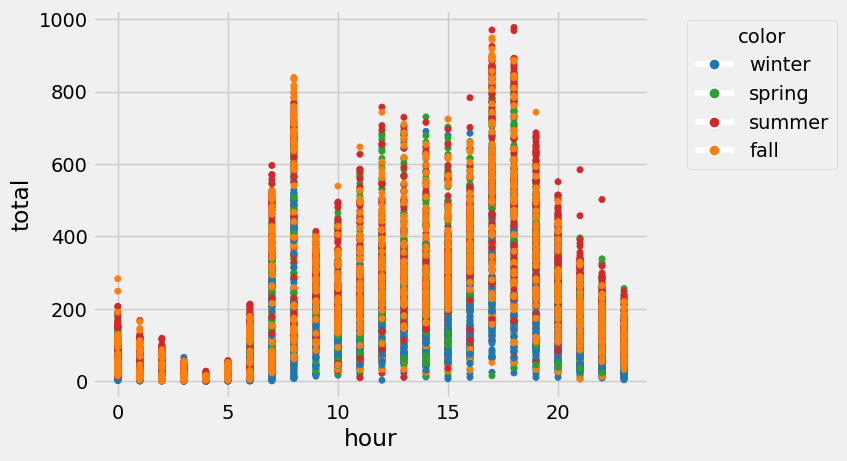

In [168]:
# Celda 3
pd.options.display.max_colwidth = 300

# Crear el dataframe para la regresion
nombre_estaciones = {1:'winter', 2:'spring', 3:'summer', 4:'fall'} # season (1:winter, 2:spring, 3:summer, 4:fall)

bikes['nombre_estacion'] = bikes['season'].map(nombre_estaciones)
bikes_regresion = bikes[['total','hour','nombre_estacion']]
season_dummies = pd.get_dummies(bikes_regresion['nombre_estacion'], prefix='season', drop_first=True)
bikes_regresion = pd.concat([bikes_regresion, season_dummies], axis=1)

# Definir la variable dependiente (y) y las variables independientes (X)
y_reg = bikes_regresion['total']
X_reg = bikes_regresion[['hour', 'season_spring','season_summer','season_winter']]

# Crear el modelo de regresión lineal
reg = LinearRegression()

# Ajustar el modelo a los datos
reg.fit(X_reg, y_reg)
X_columns = X_reg.columns.tolist()
coef = reg.coef_.tolist()

coef_dict = dict(zip(X_columns, coef))
coef_df = pd.DataFrame.from_dict(coef_dict, orient='index', columns=['Coeficientes'])
coef_df.loc['Intercepto'] = reg.intercept_

Interpretacion = ['Se espera un aumento promedio de 10 pasajeros por cada hora que avanza el día',
                  'Se espera que en primavera, en promedio, haya un aumento de 16 personas con respecto al otoño',
                  'Se espera que en verano, en promedio, haya un aumento de 35 personas con respecto al otoño',
                  'Se espera que en invierno, en promedio, haya una disminución de 84 personas con respecto al otoño',
                  'Se espera, que en promedio, cuando las demas variables explicativas sean cero, hallan 77 personas']
coef_df['Interpretacion'] = Interpretacion

display(coef_df)
limitaciones = """La principal limitación de la regresión lineal es que asume un comportamiento lineal entre las variables, 
lo cual no siempre es cierto. En el caso de la predicción del número de usuarios, se observa en la gráfica que no hay un 
patrón estable a medida que avanzan las horas del día. Por lo tanto, el modelo puede fallar en ciertas horas, incluso si se
incluyen variables como las horas pico o valle. Para una predicción más precisa, se requerirían de más variables.
"""
display(print(limitaciones))

from matplotlib.lines import Line2D 
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
colors = {1:'tab:blue', 2:'tab:green', 3:'tab:red', 4:'tab:orange'} # season (1:winter, 2:spring, 3:summer, 4:fall)
colors_text = {'winter':'tab:blue', 'spring':'tab:green', 'summer':'tab:red', 'fall':'tab:orange'} # season (1:winter, 2:spring, 3:summer, 4:fall)
data_types_dict = {'season': str}
bikes['color'] = bikes.season.map(colors)
bikes.plot(kind='scatter', x='hour', y='total',c='color')
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors_text.items()]
plt.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left');


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [195]:
# Celda 4
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def mse(y):
    n = len(y)
    mean_y = sum(y) / n
    return sum((y - mean_y)**2) / n
def mse_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = mse(y)
    gini_l = mse(y_l)
    gini_r = mse(y_r)
    
    mse_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return mse_impurity_

def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = mse_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = mse(y)
    #y_prob = mse(y.shape[0])  # Corrección Laplace 
    
    #tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    tree = dict(y_pred=y_pred, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

season_dummies_all = pd.get_dummies(bikes['nombre_estacion'], prefix='season')
bikes_tree = pd.concat([bikes, season_dummies_all], axis=1)

# Definir la variable dependiente (y) y las variables independientes (X)
y = bikes_tree['total']
X = bikes_tree[['hour', 'season_spring','season_summer','season_winter','season_fall']]

arbol = tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10)

nodos_terminales ={}
nodos_terminales ["arbol['sl']['sl']['sl']"]= arbol['sl']['sl']['sl']
nodos_terminales ["arbol['sl']['sl']['sr']"]= arbol['sl']['sl']['sr']

nodos_terminales ["arbol['sl']['sr']['sl']"]= arbol['sl']['sr']['sl']
nodos_terminales ["arbol['sl']['sr']['sr']"]= arbol['sl']['sr']['sr']

nodos_terminales ["arbol['sr']['sl']['sl']"]= arbol['sr']['sl']['sl']
nodos_terminales ["arbol['sr']['sl']['sr']"]= arbol['sr']['sl']['sr']

nodos_terminales ["arbol['sr']['sr']['sl']"]= arbol['sr']['sr']['sl']
nodos_terminales ["arbol['sr']['sr']['sr']"]= arbol['sr']['sr']['sr']

nodos_terminales = pd.DataFrame.from_dict(nodos_terminales, orient="index").rename(columns={'y_pred':'mse_pred','gain':'gain_last_split'})
nodos_terminales['mse_inicial'] = mse(y)
display(nodos_terminales[['mse_inicial','mse_pred','level','split','n_samples','gain_last_split']])
print("De los ocho nodos terminales revisados, solamente en uno no hay ganancia con el Error Cuadrático Medio")


,mse_inicial,mse_pred,level,split,n_samples,gain_last_split
arbol['sl']['sl']['sl'],32810.298886,945.780264,3,-1,2684,191.404415
arbol['sl']['sl']['sr'],32810.298886,2990.464611,3,-1,455,371.547796
arbol['sl']['sr']['sl'],32810.298886,26523.062011,3,-1,342,233.646460
arbol['sl']['sr']['sr'],32810.298886,11099.608427,3,-1,113,0.000000
arbol['sr']['sl']['sl'],32810.298886,31920.508276,3,-1,4446,3563.327053
arbol['sr']['sl']['sr'],32810.298886,17835.023720,3,-1,1478,567.356286
arbol['sr']['sr']['sl'],32810.298886,5817.450186,3,-1,1026,1163.631552
arbol['sr']['sr']['sr'],32810.298886,2537.335556,3,-1,342,334.058343


De los ocho nodos terminales revisados, solamente en uno no hay ganancia con el Error Cuadrático Medio


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

(0.0009590192369007704, 1)

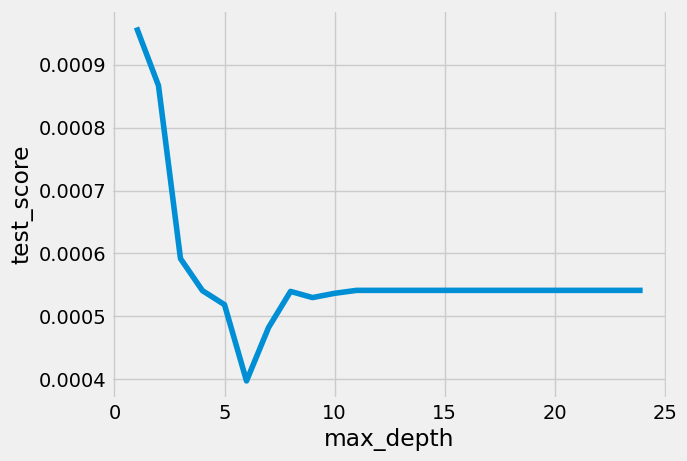

In [196]:
# Celda 5

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 25)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    #print(mse(cross_validate(clf, X, y, cv=10)['test_score']))
    accuracy_scores.append(mse(cross_validate(clf, X_train, y_train, cv=10)['test_score']))

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('test_score');

sorted(zip(accuracy_scores, max_depth_range))[::-1][0]



[73, 146, 219, 292, 365, 438, 511, 583, 656]

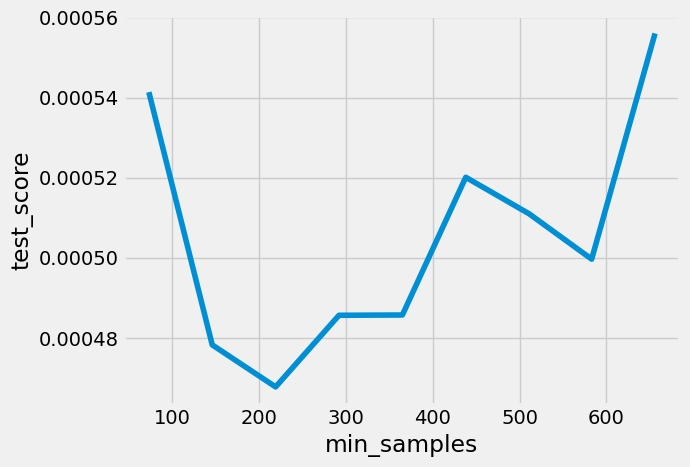

In [197]:
min_samples_split_scores = []
min_samples_split_range = [int(round(i*X_train.shape[0],0)) for i in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]]

for min_samples in min_samples_split_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    dtr = DecisionTreeRegressor(max_depth=23, random_state=1, min_samples_split = min_samples)
    #print(mse(cross_validate(clf, X, y, cv=10)['test_score']))
    min_samples_split_scores.append(mse(cross_validate(dtr, X_train, y_train, cv=10)['test_score']))

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(min_samples_split_range, min_samples_split_scores)
plt.xlabel('min_samples')
plt.ylabel('test_score');
min_samples_split_range

In [198]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval_metrics(y_test, y_pred):
    metrics = {}
    metrics['MAE'] = mean_absolute_error(y_test, y_pred)
    metrics['MSE'] = mean_squared_error(y_test, y_pred)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])
    metrics['R2'] = r2_score(y_test, y_pred)
    return metrics

dtr = DecisionTreeRegressor(max_depth=23, random_state=1, min_samples_split = 241)
dtr.fit(X_train, y_train)

# Definir la variable dependiente (y) y las variables independientes (X)

X_reg_test = X_test[['hour', 'season_spring','season_summer','season_winter']]

modelos = {}
modelos['arbol'] = eval_metrics(y_test,dtr.predict(X_test))

modelos['regesion lineal'] = eval_metrics(y_test,reg.predict(X_reg_test))
resultado_modelos = pd.DataFrame.from_dict(modelos, orient='index')

display(resultado_modelos)
analisis_modelos = """
Al comparar los modelos de predicción árbol de decisión y regresión lineal bajo cuatro métricas de desempeño (MAE, MSE, RMSE y R2),
los resultados muestran que el modelo basado en el árbol de decisión superó al modelo de regresión lineal en todas las métricas evaluadas.
En particular, el modelo de árbol de decisión logró una menor MAE, MSE y RMSE, lo que sugiere que su capacidad para predecir valores 
cercanos a los observados es mejor. Además, el modelo de árbol de decisión presentó un R2 significativamente mayor, lo que
indica que explica mejor la variabilidad en los datos. Por lo tanto, se concluye que el modelo basado en árbol de decisión es
superior al modelo de regresión lineal en términos de desempeño.
"""

print(analisis_modelos)



,MAE,MSE,RMSE,R2
arbol,80.584329,14092.339928,118.711162,0.564655
regesion lineal,118.692889,25284.622063,159.011390,0.218899



Al comparar los modelos de predicción árbol de decisión y regresión lineal bajo cuatro métricas de desempeño (MAE, MSE, RMSE y R2),
los resultados muestran que el modelo basado en el árbol de decisión superó al modelo de regresión lineal en todas las métricas evaluadas.
En particular, el modelo de árbol de decisión logró una menor MAE, MSE y RMSE, lo que sugiere que su capacidad para predecir valores 
cercanos a los observados es mejor. Además, el modelo de árbol de decisión presentó un R2 significativamente mayor, lo que
indica que explica mejor la variabilidad en los datos. Por lo tanto, se concluye que el modelo basado en árbol de decisión es
superior al modelo de regresión lineal en términos de desempeño.



## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [199]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-report-whats-next/,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,2.0,4.702128,7.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1300.0,259.718000,0.0,843300.0,482257.142857,0.000000,6963.954292,3415.943322,4500.0,4500.0,4500.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.028582,0.028594,0.028578,0.745673,0.168573,0.625376,0.144737,0.053191,0.021277,0.714286,0.285714,0.470000,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kickstarter/,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,0.0,5.010101,8.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,919.0,250.142857,0.0,843300.0,142712.500000,0.000000,4429.750000,2610.941050,928.0,928.0,928.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.027098,0.025006,0.276713,0.025003,0.646181,0.376439,0.056574,0.030303,0.030303,0.500000,0.500000,0.342778,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-porn-clip/,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,0.0,3.972376,6.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,791.0,205.666667,4800.0,843300.0,229066.666667,2440.825000,3300.698315,2895.516309,1300.0,1300.0,1300.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.033499,0.200063,0.033411,0.033334,0.699693,0.462500,0.535795,0.049724,0.000000,1.000000,0.000000,0.516263,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-most-shared-ads-of-2013/,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,0.0,4.467350,7.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1200.0,280.800000,0.0,843300.0,335642.857143,0.000000,4415.722689,2103.971787,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.457963,0.028580,0.456140,0.028627,0.028690,0.425314,0.091016,0.030730,0.023047,0.571429,0.428571,0.436654,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-prank/,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,0.0,5.146893,4.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,935.0,268.250000,1700.0,843300.0,258100.000000,1218.111111,3588.790194,2809.374181,2400.0,8200.0,5300.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051121,0.050014,0.050167,0.050003,0.798695,0.370238,0.148214,0.039548,0.011299,0.777778,0.222222,0.346429,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [202]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [203]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

(0.6308888888888888, 2)

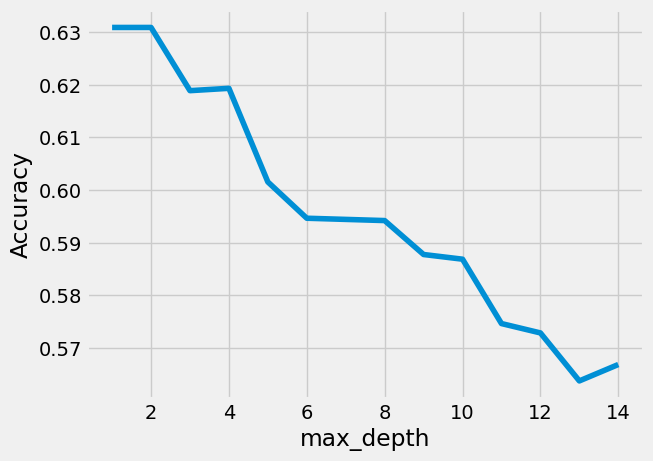

In [204]:
# Celda 6

max_depth_range = range(1, 15)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

tree = DecisionTreeClassifier(max_depth=2, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

# Imprimir los resultados
print("Desempeño del árbol de decisión:")
print(f"Accuracy: {acc_tree}")
print(f"F1-Score: {f1_tree}")
print("\nDesempeño de la regresión logística:")
print(f"Accuracy: {acc_logreg}")
print(f"F1-Score: {f1_logreg}")

analisis = """
El árbol de decisión tuvo un mejor desempeño que la regresión logística en la clasificación de datos con 
una precisión y puntaje F1 más altos. Esto sugiere que el árbol es más efectivo en la predicción
y proporciona una mayor comprensión de las características importantes para la clasificación. Además, es
de resaltar que la mejor métrica de comparación es el f1-score, que combina precisión y exhaustividad."""

print("\n",analisis)

Desempeño del árbol de decisión:
Accuracy: 0.6453333333333333
F1-Score: 0.6453289196958572

Desempeño de la regresión logística:
Accuracy: 0.6126666666666667
F1-Score: 0.6126231108428497

 
El árbol de decisión tuvo un mejor desempeño que la regresión logística en la clasificación de datos con 
una precisión y puntaje F1 más altos. Esto sugiere que el árbol es más efectivo en la predicción
y proporciona una mayor comprensión de las características importantes para la clasificación. Además, es
de resaltar que la mejor métrica de comparación es el f1-score, que combina precisión y exhaustividad.


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [222]:
# Celda 7
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
clf_max_depth_12 = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42,max_depth = 12), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf_max_depth_12.fit(X_train, y_train)
y_pred = clf_max_depth_12.predict(X_test)
resultados_modelos = {}
resultados_modelos['clf_max_depth_12'] = {'f1_score':metrics.f1_score(y_pred, y_test), 
                                          'accuracy_score': metrics.accuracy_score(y_pred, y_test)}

clf_min_samples_0_05 = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42,min_samples_leaf= 0.05), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf_min_samples_0_05.fit(X_train, y_train)
y_pred = clf_min_samples_0_05.predict(X_test)
resultados_modelos['clf_min_samples_0_05'] = {'f1_score':metrics.f1_score(y_pred, y_test), 
                                          'accuracy_score': metrics.accuracy_score(y_pred, y_test)}


log_reg_100 = BaggingClassifier(base_estimator=LogisticRegression(random_state=42), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
log_reg_100.fit(X_train, y_train)
y_pred = log_reg_100.predict(X_test)
resultados_modelos['log_reg_100'] = {'f1_score':metrics.f1_score(y_pred, y_test), 
                                          'accuracy_score': metrics.accuracy_score(y_pred, y_test)}


print(pd.DataFrame.from_dict(resultados_modelos, orient="index"))


                      f1_score  accuracy_score
clf_max_depth_12      0.658777        0.654000
clf_min_samples_0_05  0.645904        0.651333
log_reg_100           0.614450        0.619333


In [226]:
analisis_votacion_mayoritaria = """
Se observa un mejor desempeño en los árboles que la regresión logística. La relación entre profundidad y el numero de ejemplos del
nodo, parecen ir en contravía. Una mayor profundidad le permite hacer más divisiones, pero si se deja un numero de ejemplos
muy bajo en el entrenamiento va a redundar en un sobreajuste y por tanto un menor rendimiento. En este caso parece que el tamano del 
5% de datos en los nodos es muy bajo.
"""
print(analisis_votacion_mayoritaria)



Se observa un mejor desempeño en los árboles que la regresión logística. La relación entre profundidad y el numero de ejemplos del
nodo, parecen ir en contravía. Una mayor profundidad le permite hacer más divisiones, pero si se deja un numero de ejemplos
muy bajo en el entrenamiento va a redundar en un sobreajuste y por tanto un menor rendimiento. En este caso parece que el tamano del 
5% de datos en los nodos es muy bajo.



### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [223]:
# Celda 8
# Definición del modelo BaggingClassifier de la libreria sklearn
clf_max_depth_12 = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42,max_depth = 12), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf_max_depth_12.fit(X_train, y_train)
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf_max_depth_12.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf_max_depth_12.n_estimators))

for i in range(clf_max_depth_12.n_estimators):
    oob_sample = ~clf_max_depth_12.estimators_samples_[i]
    y_pred_ = clf_max_depth_12.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf_max_depth_12.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(int)

#resultados_modelos = {}
resultados_modelos['clf_max_depth_12_vot'] = {'f1_score':metrics.f1_score(y_pred, y_test), 
                                          'accuracy_score': metrics.accuracy_score(y_pred, y_test)}

clf_min_samples_0_05 = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42,min_samples_leaf= 0.05), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf_min_samples_0_05.fit(X_train, y_train)
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf_min_samples_0_05.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf_min_samples_0_05.n_estimators))

for i in range(clf_min_samples_0_05.n_estimators):
    oob_sample = ~clf_min_samples_0_05.estimators_samples_[i]
    y_pred_ = clf_min_samples_0_05.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf_min_samples_0_05.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(int)

resultados_modelos['clf_min_samples_0_05_vot'] = {'f1_score':metrics.f1_score(y_pred, y_test), 
                                          'accuracy_score': metrics.accuracy_score(y_pred, y_test)}


log_reg_100 = BaggingClassifier(base_estimator=LogisticRegression(random_state=42), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
log_reg_100.fit(X_train, y_train)
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(log_reg_100.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], log_reg_100.n_estimators))

for i in range(log_reg_100.n_estimators):
    oob_sample = ~log_reg_100.estimators_samples_[i]
    y_pred_ = log_reg_100.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = log_reg_100.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(int)

resultados_modelos['log_reg_100_vot'] = {'f1_score':metrics.f1_score(y_pred, y_test), 
                                          'accuracy_score': metrics.accuracy_score(y_pred, y_test)}


resultados_modelos = pd.DataFrame.from_dict(resultados_modelos, orient="index")
resultados_modelos


,f1_score,accuracy_score
clf_max_depth_12,0.658777,0.654000
clf_min_samples_0_05,0.645904,0.651333
log_reg_100,0.614450,0.619333
clf_max_depth_12_vot,0.656021,0.655333
clf_min_samples_0_05_vot,0.655451,0.658667
log_reg_100_vot,0.615488,0.619333


In [227]:
analisis_votacion_mayoritaria = """
Se observa la votación ponderada mejora el rendimiento de los modelos, pero no mejoró el del mejor modelo. Esto quiere decir que
está faltando algún otro hiperparámetro ya que no hay ganancia en el modelo.

Si fuera por evaluar la mejora sustancial, se observa que hay una mejorìa en los modelos de árbol, la ganancia en los modelos de regresion
logística es mínima, pero como se podría esperar, mejoró el rendimiento.
"""
print(analisis_votacion_mayoritaria)


Se observa la votación ponderada mejora el rendimiento de los modelos, pero no mejoró el del mejor modelo. Esto quiere decir que
está faltando algún otro hiperparámetro ya que no hay ganancia en el modelo.

Si fuera por evaluar la mejora sustancial, se observa que hay una mejorìa en los modelos de árbol, la ganancia en los modelos de regresion
logística es mínima, pero como se podría esperar, mejoró el rendimiento.



### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [224]:
# Celda 9

Analisis_final = """
Según los escenarios de los modelos por votacion ponderada (sufijo vot) y los de votacion mayoritaria, hay una mejoría en las métricas
de desempeño de los modelos. Si se toma f-1 score como el mejor modelo es clf_max_depth_12 (por mayoría solamente) el que tiene el mejor 
desempeño con un 65.8777%. No obstante se ve una mejoría en los modelos con un mínimo de ejemplos por nodo y en regresión.

A partir de los resultados anteriores y los escenarios evaluados, se obtiene lo siguiente:

-- ventajas

1. Los modelos por mayoría simple tienen una interpretabilidad, ya que es por una mayorìa
2. Es importante evaluar disintos modelos. Por ejemplo, una gran diferencia entre modelos
   puede indicar que se debe revisar la data de entrada. La regresión logística es susceptible
   a los outliers
3. Si se quiere una mejora en la predicción se debe usar la votación mayoritaria (los modelos que no 
   mejoraron, puede ser por el valor del hiperparámetro escogido)

-- desventajas

1. Los modelos por votación ponderada si mejoran la predicción, pero baja su interpretabilidad
2. Si los hiperparámetros no se seleccionan bien, un modelo más robusto, como votación ponderada,
   no tiene garantía de mostrar una mejoría en los criterios de evaluación. 

 """

print(Analisis_final)


Según los escenarios de los modelos por votacion ponderada (sufijo vot) y los de votacion mayoritaria, hay una mejoría en las métricas
de desempeño de los modelos. Si se toma f-1 score como el mejor modelo es clf_max_depth_12 (por mayoría solamente) el que tiene el mejor 
desempeño con un 65.8777%. No obstante se ve una mejoría en los modelos con un mínimo de ejemplos por nodo y en regresión.

A partir de los resultados anteriores y los escenarios evaluados, se obtiene lo siguiente:

-- ventajas

1. Los modelos por mayoría simple tienen una interpretabilidad, ya que es por una mayorìa
2. Es importante evaluar disintos modelos. Por ejemplo, una gran diferencia entre modelos
   puede indicar que se debe revisar la data de entrada. La regresión logística es susceptible
   a los outliers
3. Si se quiere una mejora en la predicción se debe usar la votación mayoritaria (los modelos que no 
   mejoraron, puede ser por el valor del hiperparámetro escogido)

-- desventajas

1. Los modelos por 